<h2> Лабораторная работа 4 </h2>
<h3> Дискриминантный анализ неоднородных данных </h3>

Опираясь на процесс предварительного анализа в лабораторной работе 3, можно точно сказать, что мы имеем четкое разделение на два кластера.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import tree
from matplotlib import pyplot

Подгрузили необходимый dataset, создали dataframe с необходимыми нам видами ириса "setosa" и "virginica". Так же для более удобной работы переименовали переменные.

In [5]:
ds = datasets.load_iris()

ext_target = ds.target[:, None]
df = pd.DataFrame(
    np.concatenate((ds.data, ds.target_names[ext_target]), axis=1),
    columns=ds.feature_names + ['target_name'])

df = df.loc[df['target_name'] != 'versicolor'].reset_index(drop=True)

df = df.rename(columns={
    'sepal width (cm)': 'sepalwid', 
    'sepal length (cm)': 'sepallen', 
    'petal length (cm)': 'petallen', 
    'petal width (cm)':'petalwid'})

df

,sepallen,sepalwid,petallen,petalwid,target_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica


Для применения необходимых нам алгоритмов разделим выборку на обучающую и тестовую в соотношении 80 на 20.

In [6]:
features = df.drop(columns=['target_name'], axis=1)
labels = df["target_name"]

X_train, X_test, y_train, y_test = train_test_split(features, labels,  test_size=0.20, random_state=0)

Создадим модель линейного дискриминантного анализа, который обучается на ранее созданной обучающей выборке признаков X_train и векторе меток классов y_train. Это позволяет модели изучить зависимости между признаками и классами с целью классификации данных.
Для оценки качества построенной модели выполняется кросс-валидация модели LDA на тестовых данных, представленных в матрице признаков X_test и векторе меток классов y_test. Кросс-валидация разбивает данные на k блоков, обучает модель на k-1 блоке и оценивает ее производительность на оставшемся блоке. Это повторяется несколько раз для более надежной оценки.
И вычисляем среднее значение оценок, показывающее то, насколько точно наша модель может предсказывать исход по полученным данным.

In [7]:
y_test

26       setosa
86    virginica
2        setosa
55    virginica
75    virginica
93    virginica
16       setosa
73    virginica
54    virginica
95    virginica
53    virginica
92    virginica
78    virginica
13       setosa
7        setosa
30       setosa
22       setosa
24       setosa
33       setosa
8        setosa
Name: target_name, dtype: object

In [8]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=5)

scores = cross_val_score(LDA, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
mean_accuracy = np.mean(scores)

print(mean_accuracy)

1.0


В нашем случае оценка равна 1.0, что говорит о том, что наша модель способна идеально предсказать вид ириса.

Проверим этот факт, выведя таблицу заданных видов и того, что выдала модель.

In [ ]:
predictions = LDA.predict(X_test)

df_ = pd.DataFrame(X_test.copy())
df_['Given'] = y_test
df_['Prediction'] = predictions
df_['Accuracy'] = df_['Given'] == df_['Prediction']

print(df_)

   sepallen sepalwid petallen petalwid      Given Prediction  Accuracy
26      5.0      3.4      1.6      0.4     setosa     setosa      True
86      6.3      3.4      5.6      2.4  virginica  virginica      True
2       4.7      3.2      1.3      0.2     setosa     setosa      True
55      7.6      3.0      6.6      2.1  virginica  virginica      True
75      7.2      3.2      6.0      1.8  virginica  virginica      True
93      6.8      3.2      5.9      2.3  virginica  virginica      True
16      5.4      3.9      1.3      0.4     setosa     setosa      True
73      6.3      2.7      4.9      1.8  virginica  virginica      True
54      6.5      3.0      5.8      2.2  virginica  virginica      True
95      6.7      3.0      5.2      2.3  virginica  virginica      True
53      6.3      2.9      5.6      1.8  virginica  virginica      True
92      5.8      2.7      5.1      1.9  virginica  virginica      True
78      6.4      2.8      5.6      2.1  virginica  virginica      True
13    

В колонке "Accuracy" видно, что для всех 20 элементов предсказание было точным.

Отобразим результаты анализа.

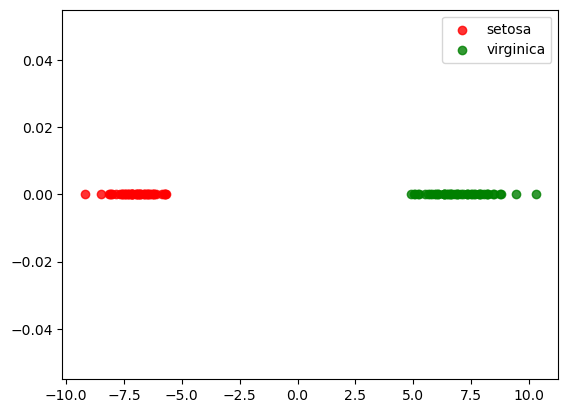

In [ ]:
X = df.drop(columns=['target_name'], axis=1)
y = df["target_name"]

data_plot = LDA.fit_transform(X, y)

target_names = ['setosa', 'virginica']

plt.figure()
colors = ['red', 'green']
lw = 1
for color, target_name in zip(colors, target_names):
    plt.scatter(data_plot[y == target_name, 0], np.zeros_like(data_plot[y == target_name, 0]), alpha=0.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

На графике точно видны два класса.

Создадим модель квадратичного дискриминантного анализа, который обучается по тому же принципу, что и LDA. Проверка так же идентична LDA.

In [ ]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=5)

scores = cross_val_score(QDA, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
mean_accuracy = np.mean(scores)

print(mean_accuracy)

1.0


В нашем случае оценка равна 1.0, что говорит о том, что наша модель способна идеально предсказать вид ириса.

Проверим этот факт, выведя таблицу заданных видов и того, что выдала модель.

In [ ]:
predictions = QDA.predict(X_test)

df_ = pd.DataFrame(X_test.copy())
df_['Given'] = y_test
df_['Prediction'] = predictions
df_['Accuracy'] = df_['Given'] == df_['Prediction']

print(df_)

   sepallen sepalwid petallen petalwid      Given Prediction  Accuracy
26      5.0      3.4      1.6      0.4     setosa     setosa      True
86      6.3      3.4      5.6      2.4  virginica  virginica      True
2       4.7      3.2      1.3      0.2     setosa     setosa      True
55      7.6      3.0      6.6      2.1  virginica  virginica      True
75      7.2      3.2      6.0      1.8  virginica  virginica      True
93      6.8      3.2      5.9      2.3  virginica  virginica      True
16      5.4      3.9      1.3      0.4     setosa     setosa      True
73      6.3      2.7      4.9      1.8  virginica  virginica      True
54      6.5      3.0      5.8      2.2  virginica  virginica      True
95      6.7      3.0      5.2      2.3  virginica  virginica      True
53      6.3      2.9      5.6      1.8  virginica  virginica      True
92      5.8      2.7      5.1      1.9  virginica  virginica      True
78      6.4      2.8      5.6      2.1  virginica  virginica      True
13    

В колонке "Accuracy" видно, что для всех 20 элементов предсказание было точным.

Отобразим результаты анализа.

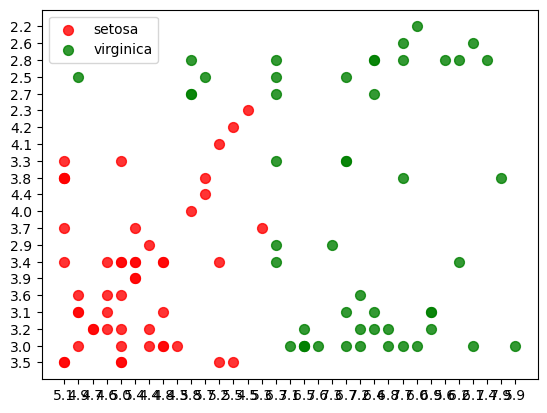

In [ ]:
data_plot = QDA.fit(X, y).predict(X)

target_names = ['setosa', 'virginica']

plt.figure()
colors = ['red', 'green']
lw = 1
for color, target_name in zip(colors, target_names):
    plt.scatter(X.loc[y == target_name, 'sepallen'], X.loc[y == target_name, 'sepalwid'], 
                s=50, alpha=0.8, color=color, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

Получили неоднозначный график, однако всё же возможно провести непрерывную кривую, которая будет четко отделять один класс от другого. 
На этом заканчивается дискриминатный анализ, результатами которого стала идеальная точность прогноза.

### Деревья решений

Рассмотрим такие модели прогнозирования, как деревья решений, а именно классификационное и регрессионное. Начнём с классификационного дерева решений.

In [ ]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

Отобразим на графике то, как наша модель распределила важность переменных в составлении прогноза.

sepallen:, Score: 0.0
sepalwid:, Score: 0.0
petallen:, Score: 0.0
petalwid:, Score: 1.0


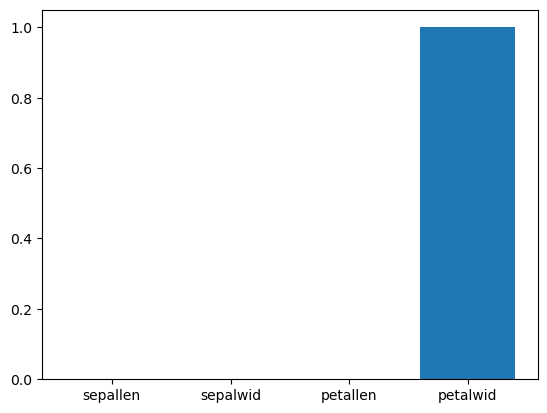

In [ ]:
importance = dtc.feature_importances_

features = ['sepallen', 'sepalwid', 'petallen', 'petalwid']

for i,v in enumerate(importance):
     print(f'{features[i]}:, Score: {v}')

x = np.array([0, 1, 2, 3])
pyplot.bar([y for y in range(len(importance))], importance)
plt.xticks(x, features)
pyplot.show()

На графике видно, что наиболее важным явялется переменная PETALWID.

Рассмотрим непосредственно полученное дерево решений.

[Text(0.5, 0.75, 'petalwid <= 1.0\ngini = 0.5\nsamples = 80\nvalue = [40, 40]\nclass = setosa'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = setosa'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]\nclass = virginica')]

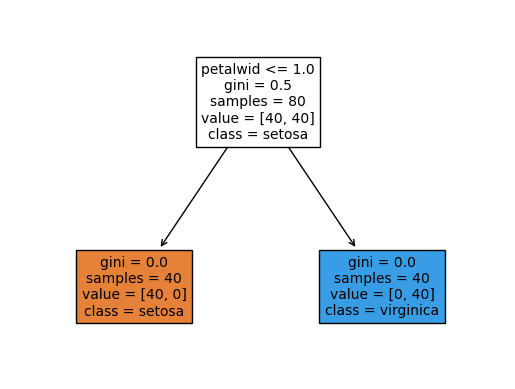

In [ ]:
tree.plot_tree(dtc, 
              feature_names=['sepallen', 'sepalwid', 'petallen', 'petalwid'],
              filled=True,
              class_names=target_names,
              fontsize=10)

Что представлено на графике:
+ В первой строчке корня можно увидеть условие, по которому модель определяет вид ириса. В данном случае, если petalwid <= 1, то ирис у нас вида "setosa", в противном случае - "virginica";
+ Во второй строчке можно увидеть коэффициент примеси Gini, который указывает на то, насколько у нас засорен класс. В корне класс был выбран "setosa", и коэффициент равен 0.5. Алгоритм останавливает, когда gini = 0, это условие достигается уже на первом уровне, потому и глубина дерева равна двум;
+ В третье строке общее число объектов;
+ В четвертой строке показано число объектов каждого из классов.

Рассмотрим таблицу, показывающую результаты предсказания модели.

In [ ]:
df_ = pd.DataFrame(X_test.copy())
df_['Given'] = y_test
df_['Prediction'] = dtc.predict(X_test)
df_['Accuracy'] = df_['Given'] == df_['Prediction']

print(df_)

   sepallen sepalwid petallen petalwid      Given Prediction  Accuracy
26      5.0      3.4      1.6      0.4     setosa     setosa      True
86      6.3      3.4      5.6      2.4  virginica  virginica      True
2       4.7      3.2      1.3      0.2     setosa     setosa      True
55      7.6      3.0      6.6      2.1  virginica  virginica      True
75      7.2      3.2      6.0      1.8  virginica  virginica      True
93      6.8      3.2      5.9      2.3  virginica  virginica      True
16      5.4      3.9      1.3      0.4     setosa     setosa      True
73      6.3      2.7      4.9      1.8  virginica  virginica      True
54      6.5      3.0      5.8      2.2  virginica  virginica      True
95      6.7      3.0      5.2      2.3  virginica  virginica      True
53      6.3      2.9      5.6      1.8  virginica  virginica      True
92      5.8      2.7      5.1      1.9  virginica  virginica      True
78      6.4      2.8      5.6      2.1  virginica  virginica      True
13    

В таблице все значения были предсказаны правильно, однако такой способ проверки не является достаточно точным, поэтому проведем проверку с помощью кросс-валидации и вычислим среднее значение оценок, показывающее то, насколько точно наша модель может предсказывать исход по полученным данным.

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5)

scores = cross_val_score(dtc, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
mean_accuracy = np.mean(scores)

print(mean_accuracy)

0.98


Получили оценку равную 0.98, что говорит о том, что наша модель точна на 98%, что является достаточно большим значением, и можно сказать, что модель достаточно точна в своих предсказаниях.

Рассмотрим регрессионное дерево решений.

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(X_train, y_train_encoded)

Отобразим на графике то, как наша модель распределила важность переменных в составлении прогноза.

sepallen:, Score: 0.0
sepalwid:, Score: 0.0
petallen:, Score: 0.0
petalwid:, Score: 1.0


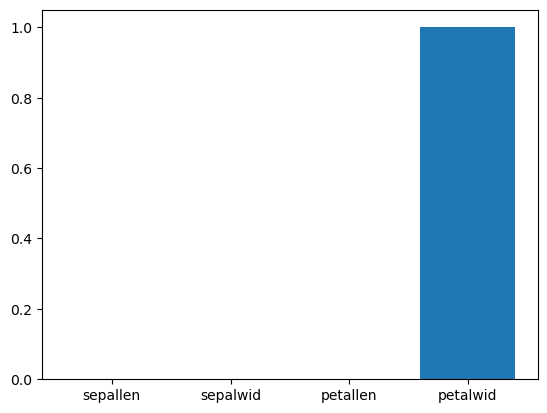

In [ ]:
importance = dtr.feature_importances_

features = ['sepallen', 'sepalwid', 'petallen', 'petalwid']

for i,v in enumerate(importance):
     print(f'{features[i]}:, Score: {v}')

x = np.array([0, 1, 2, 3])
pyplot.bar([y for y in range(len(importance))], importance)
plt.xticks(x, features)
pyplot.show()

На графике видно, что наиболее важным явялется переменная PETALWID.

Рассмотрим непосредственно полученное дерево решений.

[Text(0.5, 0.75, 'petalwid <= 1.0\nsquared_error = 0.25\nsamples = 80\nvalue = 0.5'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 40\nvalue = 0.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 40\nvalue = 1.0')]

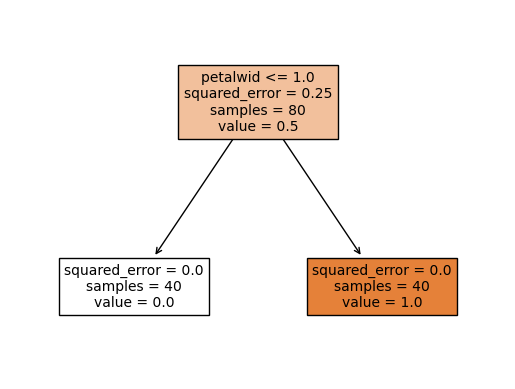

In [ ]:
tree.plot_tree(dtr, 
              feature_names=['sepallen', 'sepalwid', 'petallen', 'petalwid'],
              filled=True,
              class_names=target_names,
              fontsize=10)

Получили очень дерево, похожее на классификационное дерево решений, однако в данном случае для определения точности используется не коэффициент Gini, а квадратичная ошибка, которая применяется аналогичным образом.

Рассмотрим таблицу, показывающую результаты предсказания модели, основываясь на тестовой выборке.

In [ ]:
df_ = pd.DataFrame(X_test.copy())
df_['Given'] = y_test
df_['Prediction'] = le.inverse_transform(dtr.predict(X_test).astype('int'))
df_['Accuracy'] = df_['Given'] == df_['Prediction']

print(df_)

   sepallen sepalwid petallen petalwid      Given Prediction  Accuracy
26      5.0      3.4      1.6      0.4     setosa     setosa      True
86      6.3      3.4      5.6      2.4  virginica  virginica      True
2       4.7      3.2      1.3      0.2     setosa     setosa      True
55      7.6      3.0      6.6      2.1  virginica  virginica      True
75      7.2      3.2      6.0      1.8  virginica  virginica      True
93      6.8      3.2      5.9      2.3  virginica  virginica      True
16      5.4      3.9      1.3      0.4     setosa     setosa      True
73      6.3      2.7      4.9      1.8  virginica  virginica      True
54      6.5      3.0      5.8      2.2  virginica  virginica      True
95      6.7      3.0      5.2      2.3  virginica  virginica      True
53      6.3      2.9      5.6      1.8  virginica  virginica      True
92      5.8      2.7      5.1      1.9  virginica  virginica      True
78      6.4      2.8      5.6      2.1  virginica  virginica      True
13    

В таблице все значения были предсказаны правильно, однако такой способ проверки не является достаточно точным, поэтому проведем проверку с помощью кросс-валидации и вычислим среднее значение оценок, показывающее то, насколько точно наша модель может предсказывать исход по полученным данным.

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5)

y_test_encoded = le.fit_transform(y_test)

scores = cross_val_score(dtr, X_test, y_test_encoded, scoring='accuracy', cv=cv, n_jobs=-1)
mean_accuracy = np.mean(scores)

print(mean_accuracy)

0.97


Получили оценку равную 0.97, что говорит о том, что наша модель точна на 97%, что является достаточно большим значением, и можно сказать, что модель достаточно точна в своих предсказаниях.

### Вывод

В результате лабораторной работы можно сделать вывод о том, что лучше всего для нашей выборки работает именно дискриминантный анализ, не допуская ошибок, в то время, как деревья решений хоть и точны, но не идеальны.